# QClus Tutorial

## 1. Introduction



In [4]:
import sys
sys.path.append('..')

import qclus
from qclus.gene_lists import *
import scanpy as sc
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
counts_path = "../../samples/filtered_feature_bc_matrix_739.h5"
loompy_path = "../../samples/counts_counts_CAD_739.loom"

adata = qclus.run_qclus(counts_path, 
                        loompy_path, 
                        gene_set_dict=celltype_gene_set_dict, 
                        nucl_gene_set=nucl_genes_50, 
                        minimum_genes=500, 
                        maximum_genes=6000, 
                        max_mito_perc=40, 
                        clustering_features=['pct_counts_nonCM', 
                                        'pct_counts_nucl_30', 
                                        'pct_counts_MT', 
                                        'pct_counts_CM_cyto', 
                                        'pct_counts_CM_nucl', 
                                        'fraction_unspliced'], 
                        clustering_k=4, 
                        clusters_to_select=["0", "1", "2"], 
                        scrublet_filter=True,
                        scrublet_expected_rate=0.06, 
                        scrublet_minimum_counts=2, 
                        scrublet_minimum_cells=3, 
                        scrublet_minimum_gene_variability_pctl=85, 
                        scrublet_n_pcs=30, 
                        scrublet_thresh=0.1, 
                        outlier_filter=True, 
                        outlier_unspliced_diff=0.1, 
                        outlier_mito_diff=5)

In [6]:
adata

AnnData object with n_obs × n_vars = 3404 × 36601
    obs: 'fraction_unspliced', 'pct_counts_MT', 'total_counts', 'n_genes_by_counts', 'qclus'
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
adata.obs.qclus.value_counts()

passed               2389
initial filter        338
scrublet filter       274
outlier filter        229
clustering filter     174
Name: qclus, dtype: int64

In [6]:
#run standard processing for visualization purposes
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#save raw dataset and filter genes
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.filter_genes(adata, min_cells=10)
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_MT'], n_jobs = 30)
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

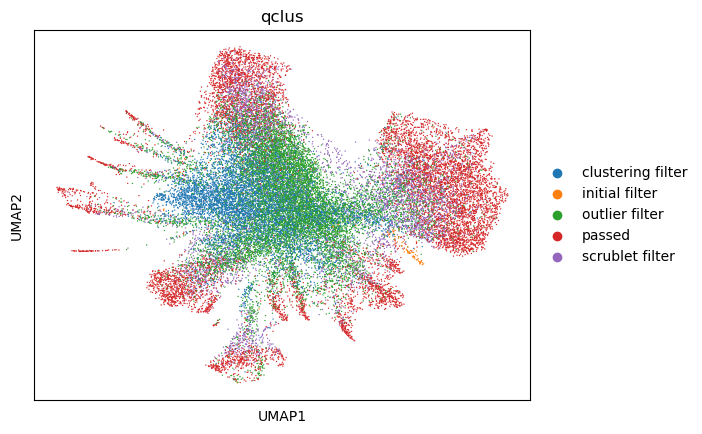

In [7]:
sc.pl.umap(adata, color="qclus")

In [8]:
adata = adata[adata.obs.qclus=="passed"]
adata

View of AnnData object with n_obs × n_vars = 8989 × 2745
    obs: 'fraction_unspliced', 'pct_counts_MT', 'total_counts', 'n_genes_by_counts', 'qclus', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'qclus_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [9]:
adata.obs

,fraction_unspliced,pct_counts_MT,total_counts,n_genes_by_counts,qclus,leiden
AAACCCAAGCAACCAG,0.688415,5.639218,3121.0,1651,passed,7
AAACCCAAGCAATTCC,0.579682,6.195015,5456.0,2852,passed,3
AAACCCAAGCATTTGC,0.615569,8.085296,2251.0,1480,passed,3
AAACCCAAGTGGTCAG,0.705882,5.137900,4496.0,2113,passed,7
AAACCCACACGAAAGC,0.746711,6.310120,5198.0,2667,passed,2
...,...,...,...,...,...,...
TTTGTTGTCACCTCTG,0.649449,9.281594,1907.0,1136,passed,1
TTTGTTGTCCTAAACG,0.695590,5.196241,3618.0,2102,passed,10
TTTGTTGTCGATTGGT,0.659710,8.874599,1555.0,1047,passed,5
TTTGTTGTCGCCCAGA,0.636263,11.628818,2554.0,1537,passed,3


In [10]:
sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

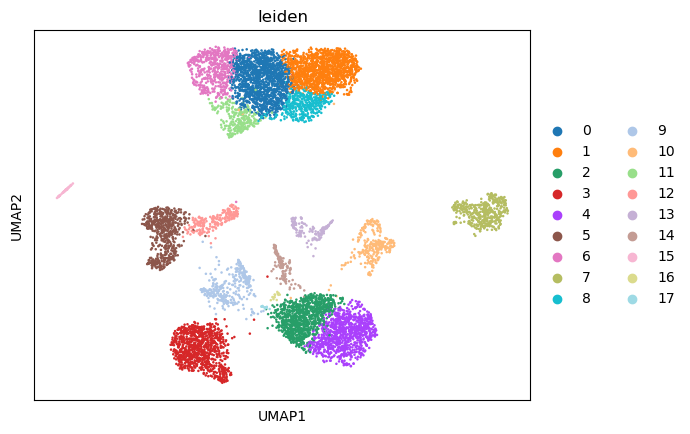

In [11]:
sc.pl.umap(adata, color="leiden")